In [5]:
import seaborn                   # 데이타
import matplotlib.pyplot as plt  # 그래프 라이브러리

tips = seaborn.load_dataset('tips') # 팁을 지불한 손님의 정보 데이타
tips.head()   # 지불금액 / 팁 / 성별 / 흡연 / 요일 / 시간대 / 인원수

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
# 한글처리
# 간단한 한글등록
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus']=False  # 추가설정 : 폰트를 변경하면 -표시가 ㅁ으로 변경되기에 '-'를 변경하지 않도록 지정
rc('font', family='Malgun Gothic') #맑은 고딕


## 1. 일변량 그래프 - 하나의 변수만 사용한 그래프

- 히스토그램(수치변수)

- 막대그래프(범주변수)

  [예] 전체지불금액(total_bill)에 대한 그래프 (히스토그램 사용)

Text(0.5, 1.0, '전체지불금액')

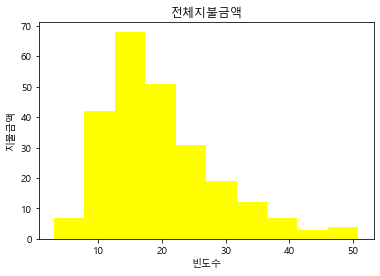

In [17]:
# 여기에 코드

plt.hist(tips['total_bill'], color='yellow')
plt.xlabel('빈도수')
plt.ylabel('지불금액')
plt.title('전체지불금액')


요일에 대한 그래프 출력



day
Thur    62
Fri     19
Sat     87
Sun     76
Name: time, dtype: int64


<BarContainer object of 4 artists>

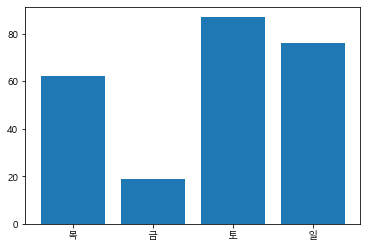

In [41]:
temp = tips.groupby('day').count()
temp['time']
print(temp['time'])
plt.bar(['목', '금', '토', '일'] ,temp['time'])


##  2. 이변량 그래프 - 변수 2개를 이용한 그래프 ( 산점도 그래프 )
    [예] 지불금액에 따른 팁 금액을 나타내는 그래프

Text(0.5, 1.0, 'scatter 그래프')

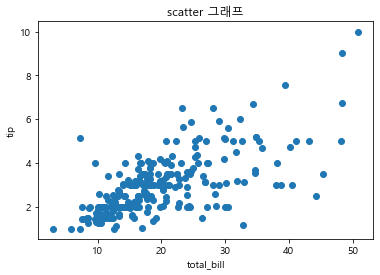

In [35]:
# 여기에 코드

plt.scatter(tips['total_bill'], tips['tip'])
# x축 y축 제목 추가
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.title('지불금액에 따른 팁의 scatter 그래프')

## 3. 이산형 변수와 연속형 변수 - 박스플롯
    이산형 - 성별이나 국적처럼 명확하게 구분되는 값
    연속형 - 수치로 이루어진 값

    [예] 성별에 따른 팁을 나타내는 그래프

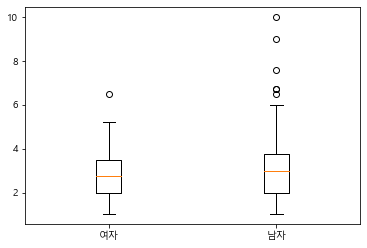

In [40]:
# 여기에 코드
female = tips[tips['sex']=='Female']['tip']
male = tips[tips['sex']=='Male']['tip']

plt.boxplot([female, male], labels=['여자', '남자']);
# 위에 동그라미 뜨는 건 이상치?.. -> 평균값이 틀어지게 하는 요소

##  4. 다변량 그래프 - 3개 이상의 변수로 그래프 - 산점도 그래프

      [예] 식사지불과 팁의 정도를 성별에 따라 그래프를 그린다면?
      
      * 성별의 문자열값을 0과 1로 변경하여 다른 색상으로 그리고자 한다

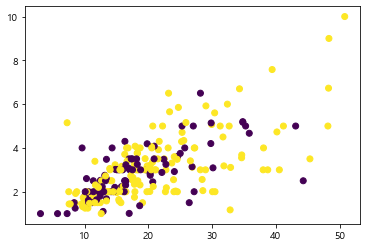

In [43]:
# (1) 성별을 0과 1로 변환하는 함수 선언
def gender(sex):
    if sex=='Female': return 0
    else : return 1
    

# (2) 변경한 성별값의 변수(컬럼 sex_color) 추가
tips['sex_color']=tips['sex'].apply(gender)
#tips

# (3) 그래프 : x와 y 축, c=점의 색상, alpha=점의 투명도, s=점의 크기
#    테이블당의 인원수를 점의 크기로 표현한다면 s=tips['size']*10 추가
plt.scatter(x=tips['total_bill'], 
            y=tips['tip'],
            c=tips['sex_color']
           )

[ 참고 ]  plt.scatter와 plt.plot 정리
